In [1]:
import numpy as np
import copy as cp
import matplotlib as mt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import matplotlib.pyplot as plt
import pyemma.plots as mplt
import pyemma.coordinates as coor
import pyemma
import pickle as pkl
import sklearn as skl
import sklearn.metrics as mtr
import sys
import os
from tqdm import tqdm
sys.path.append('../../0_python_modules/')
import navjeet_hist as nh
import extras
import metrics as mtr

In [2]:
randoms = np.loadtxt('../../1_datasets/randoms.txt', dtype=int)
weight = np.concatenate(( np.load('../../1_datasets/mopR_bindings/distance_alldata.npy', allow_pickle=True) ))
weight = np.where( (weight >= 0.35) & (weight < 1.0) )[0].shape[0]/weight.shape[0]
weight

0.05363603894591363

## intermediate

In [3]:
hdirect = np.load('saved_direct/hist.npy')
edirect = np.load('saved_direct/extents.npy')


hsupervised = [
    np.load(f'saved_supervised/hist_{i}.npy')
for i in range(len(randoms))]

esupervised = [
    np.load(f'saved_supervised/extents_{i}.npy')
for i in range(len(randoms))]


hpermute = [
    [
        np.load(f'saved_furf/hist_{h}_{i}.npy')
    for i in range(len(randoms))]
for h in range(2,11)]

epermute = [
    [
        np.load(f'saved_furf/extents_{h}_{i}.npy')
    for i in range(len(randoms))]
for h in range(2,11)]

In [4]:
impures = np.arange(0.01, 1, 0.01)
cdirect = [ nh.classification_extent( hdirect, cutoff=0.1, strategy='weighted', 
                                  output_type='jm', operation=2, jm_lower=weight, jm_impure=i)
           for i in impures]

csupervised = [
    [
        nh.classification_extent( hsupervised[r], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weight, jm_impure=i)
    for i in impures]
for r in range(len(randoms))]
csupervised = np.mean(csupervised, axis=0)

cpermute = [
    [
        [
            nh.classification_extent( hpermute[h-2][r], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weight, jm_impure=i)
        for i in impures]
    for r in range(len(randoms))]
for h in range(2,11)]
cpermute = np.mean(cpermute, axis=1)

In [5]:
cmaps = mt.cm.get_cmap('Reds')

/tmp/ipykernel_3075923/4104700905.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps = mt.cm.get_cmap('Reds')


0.4


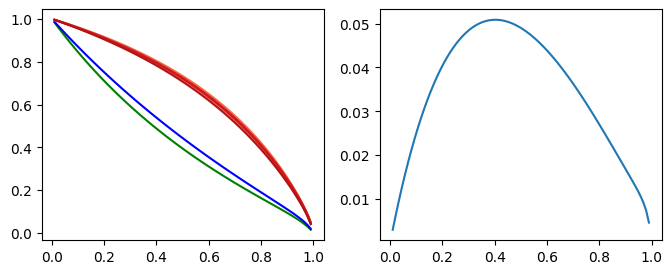

In [6]:
fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].plot(impures, cdirect,  c='g', )
ax[0].plot(impures, csupervised, c='b',)
for i in range(9): ax[0].plot(impures, cpermute[i], c=cmaps((i+2)/12))
ax[1].plot(impures, csupervised-cdirect)
print(impures[np.argmax(csupervised-cdirect)])

In [7]:
jm_impure = 0.4

In [8]:
cdirect = nh.classification_extent( hdirect, cutoff=0.1, strategy='weighted', 
                                  output_type='jm', operation=2, jm_lower=weight, jm_impure=jm_impure)

csupervised = [
        nh.classification_extent( hsupervised[r], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weight, jm_impure=jm_impure)
for r in range(len(randoms))]
csupervised = np.mean(csupervised, axis=0), np.std(csupervised, axis=0)

cpermute = [
        [
            nh.classification_extent( hpermute[h-2][r], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weight, jm_impure=jm_impure)
    for r in range(len(randoms))]
for h in range(2,11)]
cpermute = np.mean(cpermute, axis=1), np.std(cpermute, axis=1)

In [9]:
cpermute

(array([0.78071321, 0.79160313, 0.8037732 , 0.80253466, 0.80253466,
        0.79222384, 0.79700422, 0.79427072, 0.78251721]),
 array([0.01799701, 0.0116548 , 0.01621934, 0.01252458, 0.01252458,
        0.00903222, 0.02075279, 0.02102453, 0.00111143]))

In [10]:
csupervised

(0.5385364811736009, 0.031635927364710985)

In [11]:
cdirect

0.4876696619300196

In [12]:
lc = np.load('saved_furf/lc1.npy')
lc = np.mean(lc, axis=1), np.std(lc, axis=1)

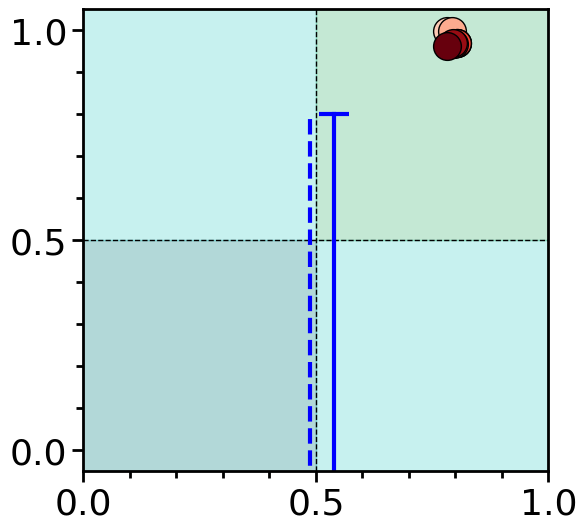

In [13]:
fig,ax=plt.subplots(1,figsize=(6,6))
ax.set_xlim(0,1)
ax.set_ylim(-0.05,1.05)
ax.axvline(0.5,c='black',lw=1, ls='--')
ax.axhline(0.5,c='black',lw=1, ls='--')
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=26, length=8, width=2)
ax.tick_params(which='minor', length=5, width=2)
#
ax.fill_between([-0.05,0.5],[-0.05,-0.05],[0.5,0.5],color='teal', alpha=0.3)
ax.fill_between([-0.05,0.5],[1.05,1.05],[0.5,0.5],color='mediumturquoise', alpha=0.3)
ax.fill_between([0.5,1.05],[-0.05,-0.05],[0.5,0.5],color='mediumturquoise', alpha=0.3)
ax.fill_between([0.5,1.05],[1.05,1.05],[0.5,0.5],color='mediumseagreen', alpha=0.3)
#
ax.plot([cdirect, cdirect], [-0.5,0.8], '--', lw=3, c='b')
ax.errorbar([csupervised[0], csupervised[0]], [-0.5,0.8], xerr=[csupervised[1], csupervised[1]], c='b', lw=3)
for a in range(9):
    ax.errorbar([cpermute[0][a]], [lc[0][a]], 
                xerr=[cpermute[1][a]], yerr=[lc[1][a]],
                fmt='o', c=cmaps((a+2)/10), ms=20, mec='black')
#
plt.savefig('plots/lc_int.pdf')
plt.show()

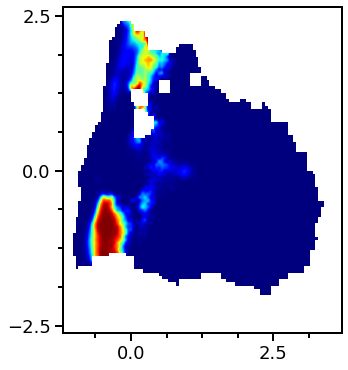

In [11]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
ax.imshow(hdirect.T, 
          aspect='auto', extent=edirect, origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/direct_int.pdf')
plt.show()

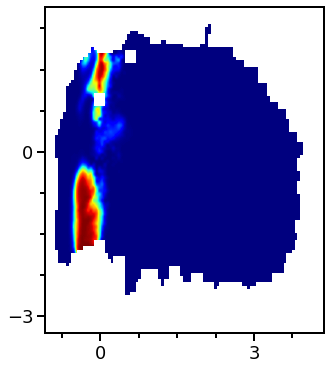

In [12]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
i=0
ax.imshow(hsupervised[i].T, 
          aspect='auto', extent=esupervised[i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/supervised_int.pdf')
plt.show()

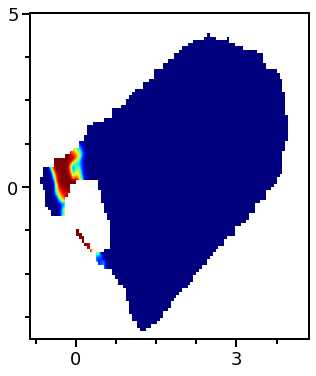

In [13]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
h,i=4,0
ax.imshow(hpermute[h-2][i].T, 
          aspect='auto', extent=epermute[h-2][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/urf_int.pdf')
plt.show()

## unbound state

In [14]:
randoms = np.loadtxt('../../1_datasets/randoms.txt', dtype=int)
weight = np.concatenate(( np.load('../../1_datasets/mopR_bindings/distance_alldata.npy', allow_pickle=True) ))
weight = np.where( weight > 1 )[0].shape[0]/weight.shape[0]
weight

0.24764404138909163

In [15]:
hdirect = np.load('saved_direct/different_state_unbound/hist.npy')
edirect = np.load('saved_direct/different_state_unbound/extents.npy')


hsupervised = [
    np.load(f'saved_supervised/different_state_unbound/hist_{i}.npy')
for i in range(len(randoms))]

esupervised = [
    np.load(f'saved_supervised/different_state_unbound/extents_{i}.npy')
for i in range(len(randoms))]


hpermute = [
    [
        np.load(f'saved_furf/different_state_unbound/hist_{h}_{i}.npy')
    for i in range(len(randoms))]
for h in range(2,11)]

epermute = [
    [
        np.load(f'saved_furf/different_state_unbound/extents_{h}_{i}.npy')
    for i in range(len(randoms))]
for h in range(2,11)]

In [16]:
impures = np.arange(0.01, 0.8, 0.01)
cdirect = [ nh.classification_extent( hdirect, cutoff=0.1, strategy='weighted', 
                                  output_type='jm', operation=2, jm_lower=weight, jm_impure=i)
           for i in impures]

csupervised = [
    [
        nh.classification_extent( hsupervised[r], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weight, jm_impure=i)
    for i in impures]
for r in range(len(randoms))]
csupervised = np.mean(csupervised, axis=0)

cpermute = [
    [
        [
            nh.classification_extent( hpermute[h-2][r], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weight, jm_impure=i)
        for i in impures]
    for r in range(len(randoms))]
for h in range(2,11)]
cpermute = np.mean(cpermute, axis=1)

0.79


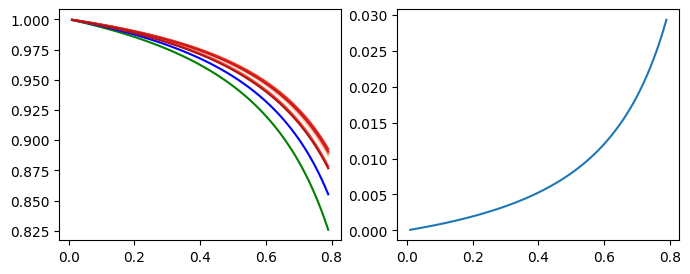

In [17]:
fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].plot(impures, cdirect,  c='g', )
ax[0].plot(impures, csupervised, c='b',)
for i in range(9): ax[0].plot(impures, cpermute[i], c=cmaps((i+2)/12))
ax[1].plot(impures, csupervised-cdirect)
print(impures[np.argmax(csupervised-cdirect)])

In [18]:
jm_impure=0.5

In [19]:
cdirect = nh.classification_extent( hdirect, cutoff=0.1, strategy='weighted', 
                                  output_type='jm', operation=2, jm_lower=weight, jm_impure=jm_impure)

csupervised = [
        nh.classification_extent( hsupervised[r], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weight, jm_impure=jm_impure)
for r in range(len(randoms))]
csupervised = np.mean(csupervised, axis=0), np.std(csupervised, axis=0)

cpermute = [
        [
            nh.classification_extent( hpermute[h-2][r], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weight, jm_impure=jm_impure)
    for r in range(len(randoms))]
for h in range(2,11)]
cpermute = np.mean(cpermute, axis=1), np.std(cpermute, axis=1)

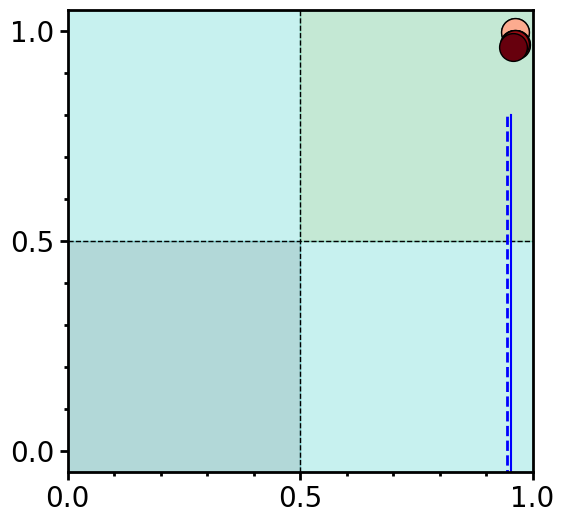

In [20]:
fig,ax=plt.subplots(1,figsize=(6,6))
ax.set_xlim(0,1)
ax.set_ylim(-0.05,1.05)
ax.axvline(0.5,c='black',lw=1, ls='--')
ax.axhline(0.5,c='black',lw=1, ls='--')
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=20, length=6, width=2)
ax.tick_params(which='minor', length=3, width=2)
#
ax.fill_between([-0.05,0.5],[-0.05,-0.05],[0.5,0.5],color='teal', alpha=0.3)
ax.fill_between([-0.05,0.5],[1.05,1.05],[0.5,0.5],color='mediumturquoise', alpha=0.3)
ax.fill_between([0.5,1.05],[-0.05,-0.05],[0.5,0.5],color='mediumturquoise', alpha=0.3)
ax.fill_between([0.5,1.05],[1.05,1.05],[0.5,0.5],color='mediumseagreen', alpha=0.3)
#
ax.plot([cdirect, cdirect], [-0.5,0.8], '--', lw=2, c='b')
ax.errorbar([csupervised[0], csupervised[0]], [-0.5,0.8], xerr=[csupervised[1], csupervised[1]], c='b')
for a in range(9):
    ax.errorbar([cpermute[0][a]], [lc[0][a]], 
                xerr=[cpermute[1][a]], yerr=[lc[1][a]],
                fmt='o', c=cmaps((a+2)/10), ms=20, mec='black')
#
plt.savefig('plots/lc_unbound.pdf')
plt.show()

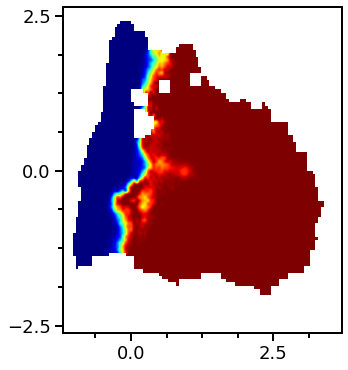

In [22]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
ax.imshow(hdirect.T, 
          aspect='auto', extent=edirect, origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/direct_unbound.pdf')
plt.show()

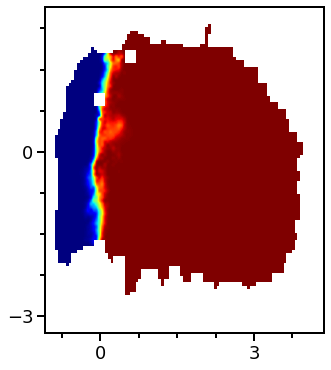

In [23]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
i=0
ax.imshow(hsupervised[i].T, 
          aspect='auto', extent=esupervised[i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/supervised_unbound.pdf')
plt.show()

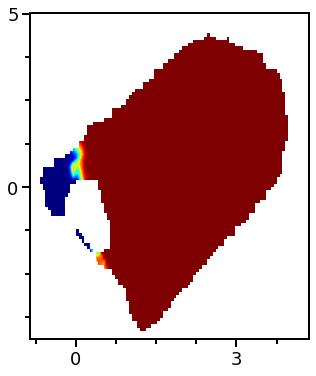

In [24]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
h,i=4,0
ax.imshow(hpermute[h-2][i].T, 
          aspect='auto', extent=epermute[h-2][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/urf_unbound.pdf')
plt.show()

In [25]:
fsupervised = [np.load(f'saved_supervised/fimp_supervised_{i}.npy') for i in range(5)]
fsupervised = [np.cumsum(i[i.argsort()[::-1]]) for i in fsupervised]
fsupervised = np.mean(fsupervised, axis=0), np.std(fsupervised, axis=0)

In [26]:
fpermute = [
    [
        np.load(f'saved_furf/fimp_hlabel{h}_{i}.npy')
    for i in range(5)]
for h in range(2,11)]
fpermute = [[np.cumsum(j[j.argsort()[::-1]]) for j in i] for i in fpermute]
fpermute = np.mean(fpermute, axis=1), np.std(fpermute, axis=1)

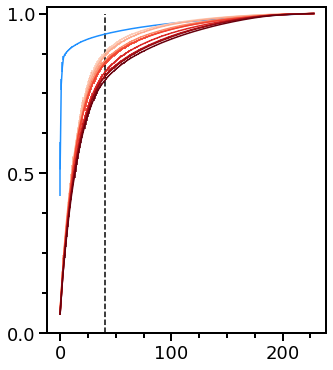

In [28]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(3))
ax.tick_params(which='minor', length=5, width=2)
ax.set_ylim(0,1.02)
ax.set_yticks([0,0.5,1])
#
ax.errorbar(range(len(fsupervised[0])), fsupervised[0], yerr=fsupervised[1], c='dodgerblue')
for h in range(2,11): ax.errorbar(range(fsupervised[0].shape[0]), fpermute[0][h-2], yerr=fpermute[1][h-2],
                                  c=cmaps(h/10))
ax.plot([40,40],[0,1], '--', c='black')
#
plt.savefig(f'plots/fimp.pdf')
plt.show()

In [29]:
fpermute[0][:,40]

array([0.87459307, 0.86744773, 0.85117213, 0.84342061, 0.84309241,
       0.81547898, 0.80429376, 0.80187816, 0.79010585])

In [31]:
fsupervised[0][40]

0.9354141487669185

## vamps

In [3]:
hvampi = np.load('saved_vamp/histi.npy')
evampi = np.load('saved_vamp/extenti.npy')

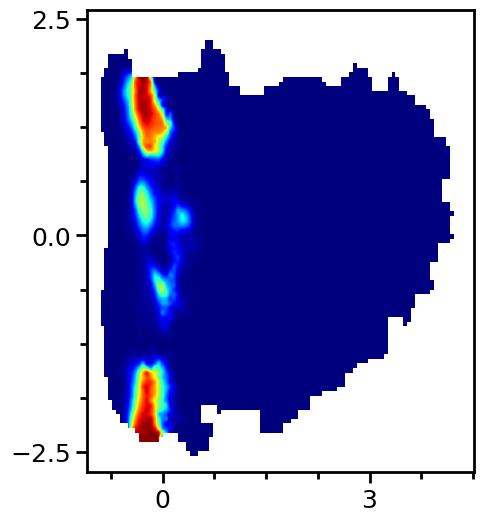

In [13]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
i=0
ax.imshow(hvampi[i].T, 
          aspect='auto', extent=evampi[i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/vamp_int.pdf')
plt.show()

In [10]:
cvampi = [ nh.classification_extent(i, cutoff=0.1, strategy='weighted',
                        output_type='jm', operation=2, jm_lower=weight, jm_impure=0.4)
         for i in hvampi]
cvampi = np.mean(cvampi), np.std(cvampi)

In [12]:
cvampi

(0.6629512418594394, 0.09164344719826804)